# Data Science Work Prompt - VeloCityX Fan Engagement


## Prompt Description 

VelocityX is focused on creating an immersive spectator experience that monetizes and promotes the world autonomous racing. Here are some features of the app. 

**Immersive Fan Experience**: During major racing events, VeloCityX offers “Live 360” coverage. Using mobile devices, fans can experience races from multiple angles, including cockpit views, aerial drones. Live chats and forums allow fans to discuss races in real-time. 

**Interactive Fan Engagement**: For interactive fan engagement, VelocityX introduces “Fan challenges” users can predict race outcomes, such as which vehicle will complete the most laps without recharge or which team will achieve the fastest pit stop. These challenges are gamified and allow fans to earn points and rewards for accurate predictions.  

**Monetization Strategies**: VeloCityX includes “Virtual Merchandise and Sponsorship Integration” Fans can purchase virtual merchandise such as team jerseys, vehicle skins, and exclusive digital collectibles. The app offers sponsorship opportunities where brands can sponsor race events or place ads to reach target audiences.  

**Your Task**: The future of sports is here, and it’s being driven by cutting-edge autonomous vehicle technology. As part of the ongoing innovation in fan engagement, the VeloCityX app has emerged as a powerful platform for enhancing the spectator experience during major racing events. With "Live 360" coverage, interactive fan challenges, and digital merchandise, the app engages fans in real-time and offers new ways to experience the excitement of racing. 

Your mission as part of the Data Science team is to use data to improve fan engagement and provide insights that will drive monetization strategies for VeloCityX. You will explore user interaction data to draw insights on fan behavior and offer recommendations to optimize fan challenges, merchandise sales, and sponsorship integration. 

**Data Collection**: You will be provided with a CSV file that contains sample data on user interactions within the VeloCityX app. This data includes details like: 
User ID
Fan challenges completed 
Predictive accuracy in challenges 
Virtual merchandise purchases 
Sponsorship interactions (ad views, click-through rates) 
Time spent on "Live 360" coverage 
Real-time chat activity 

**Data Analysis & Cleaning**: Clean and organize the data into a usable format. Investigate trends, including: Which users are most likely to purchase virtual merchandise? How do user activities during race events correlate with their merchandise purchases and sponsorship interaction?

**Visualization**: Create data visualizations to showcase analysis. 

**Deliverables**: Include visualizations that clearly communicate your findings. Propose a new fan challenge based on your analysis, with predicted outcomes for engagement and monetization. 

## Collect the Data

In [174]:
## Start by importing pandas and getting the data sheet
import pandas as pd
fanEngagement = pd.read_csv("data/2025-VeloCityX-Expanded-Fan-Engagement-Data.csv")


### Display some basic information to help with cleaning and organizing

In [175]:
fanEngagement.columns

Index(['User ID', 'Fan Challenges Completed', 'Predictive Accuracy (%)',
       'Virtual Merchandise Purchases', 'Sponsorship Interactions (Ad Clicks)',
       'Time on Live 360 (mins)', 'Real-Time Chat Activity (Messages Sent)'],
      dtype='object')

In [176]:
fanEngagement.describe()

,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.790000,74.990000,2.670000,8.680000,129.350000,25.050000
std,2.825908,14.033506,2.064882,6.340315,38.634358,14.163101
min,1.000000,50.000000,0.000000,0.000000,60.000000,0.000000
25%,3.000000,62.000000,1.000000,2.000000,98.000000,11.000000
50%,6.000000,77.000000,2.000000,8.000000,124.500000,25.500000
75%,8.000000,86.500000,5.000000,15.000000,160.000000,35.000000
max,10.000000,98.000000,6.000000,19.000000,199.000000,49.000000


### Gather data related to total fan engagement

In [177]:
## Make a new column 'Total Engagement' that sums the columns 'Fan Challenges Completed', 'Sponsorship Interactions (Ad Clicks)',
# and 'Real-Time Chat Activity (Messages Sent)'. These best indicate how fans are interacting with the app.
fanEngagement['Total Engagement'] = (fanEngagement['Fan Challenges Completed'] + fanEngagement['Sponsorship Interactions (Ad Clicks)']
                                      + fanEngagement['Real-Time Chat Activity (Messages Sent)'])
fanEngagement.describe()

,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent),Total Engagement
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.790000,74.990000,2.670000,8.680000,129.350000,25.050000,39.520000
std,2.825908,14.033506,2.064882,6.340315,38.634358,14.163101,16.776294
min,1.000000,50.000000,0.000000,0.000000,60.000000,0.000000,5.000000
25%,3.000000,62.000000,1.000000,2.000000,98.000000,11.000000,27.000000
50%,6.000000,77.000000,2.000000,8.000000,124.500000,25.500000,42.000000
75%,8.000000,86.500000,5.000000,15.000000,160.000000,35.000000,52.250000
max,10.000000,98.000000,6.000000,19.000000,199.000000,49.000000,74.000000


## Organize and Visualize Purchasing Trends

Let's look at how many purchases fans are making

In [178]:
## This will store the number of purchases made by fans
purchases = (fanEngagement['Virtual Merchandise Purchases'].value_counts()[0],
             fanEngagement['Virtual Merchandise Purchases'].value_counts()[1],
             fanEngagement['Virtual Merchandise Purchases'].value_counts()[2],
             fanEngagement['Virtual Merchandise Purchases'].value_counts()[3],
             fanEngagement['Virtual Merchandise Purchases'].value_counts()[4],
             fanEngagement['Virtual Merchandise Purchases'].value_counts()[5],
             fanEngagement['Virtual Merchandise Purchases'].value_counts()[6])

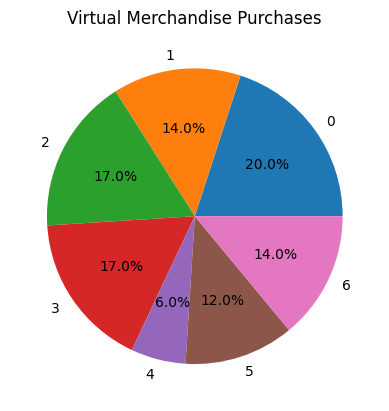

In [179]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.pie(purchases, labels = ['0', '1', '2', '3', '4', '5', '6'], autopct = '%1.1f%%')
plt.title('Virtual Merchandise Purchases')
plt.show()

As we can see, a majority of fans are not purchasing merchandize at all. The next large percentage will make either 2 or 3 purchases.

Next, lets look at how a fan's total engagement correlates to thier purchasing habits.

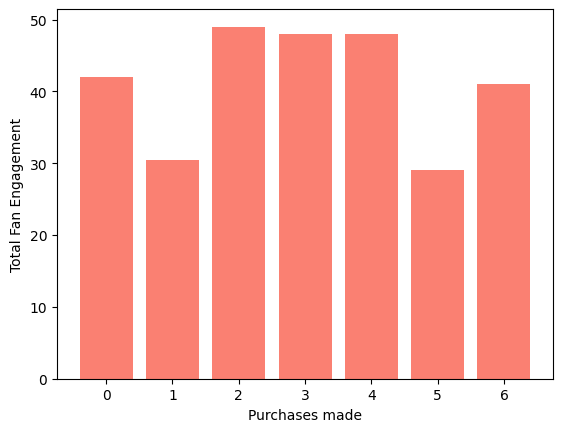

In [180]:
import statistics as st
## Filter our original dataset by each purchase amount (0, 1, etc...) and take the median total fan engagement
# for each amount (Using the median since Total Engagement has such a high standard deviation).

zeroPurchases = st.median(fanEngagement[fanEngagement['Virtual Merchandise Purchases'] == 0]['Total Engagement'])
onePurchase = st.median(fanEngagement[fanEngagement['Virtual Merchandise Purchases'] == 1]['Total Engagement'])
twoPurchase = st.median(fanEngagement[fanEngagement['Virtual Merchandise Purchases'] == 2]['Total Engagement'])
threePurchase = st.median(fanEngagement[fanEngagement['Virtual Merchandise Purchases'] == 3]['Total Engagement'])
fourPurchase = st.median(fanEngagement[fanEngagement['Virtual Merchandise Purchases'] == 4]['Total Engagement'])
fivePurchase = st.median(fanEngagement[fanEngagement['Virtual Merchandise Purchases'] == 5]['Total Engagement'])
sixPurchase = st.median(fanEngagement[fanEngagement['Virtual Merchandise Purchases'] == 6]['Total Engagement'])

## Store our data to be displayed more easily
purchaseData = {'0': zeroPurchases, '1': onePurchase, '2': twoPurchase, '3': threePurchase, '4': fourPurchase, '5': fivePurchase, '6': sixPurchase}

plt.bar(list(purchaseData.keys()), list(purchaseData.values()), color = "salmon")
plt.xlabel("Purchases made")
plt.ylabel("Total Fan Engagement")
plt.show()

The above graph shows that the most engaged fans will most likely make 2, 3, or 4 purchases. The least engaged fans will make 5 or 1. What's interesting is that fans who are not buying merchandise at all are not the least engaged, they are around the average.

Let's examine further by looking at the correlation between purchasing habits and the columns that make up 'Total Engagement' ('Fan Challenges Completed', 'Sponsorship Interactions (Ad Clicks)', and 'Real-Time Chat Activity (Messages Sent)).

### Break down total engagement

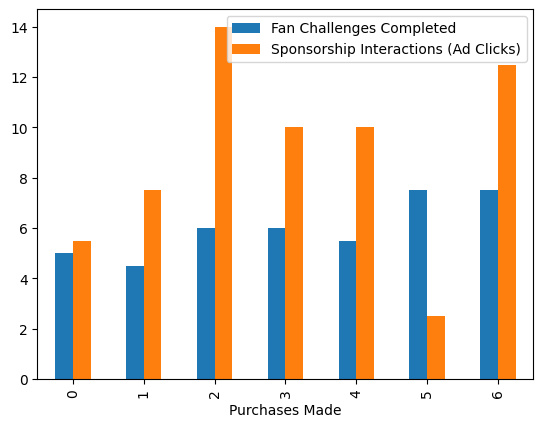

In [181]:
## Create a new dataframe by filtering our original dataset by each purchase amount (0, 1, etc...) and the median fan challenges
# completed (column one) and the median aponsorship interactions (column two). Since these two have similar ranges of value,
# they can be visualized together.
# (Using the median since both columns have such a high standard deviation).
zeroPurchasesFan = st.median(fanEngagement[fanEngagement['Virtual Merchandise Purchases'] == 0]['Fan Challenges Completed'])
onePurchaseFan = st.median(fanEngagement[fanEngagement['Virtual Merchandise Purchases'] == 1]['Fan Challenges Completed'])
twoPurchaseFan = st.median(fanEngagement[fanEngagement['Virtual Merchandise Purchases'] == 2]['Fan Challenges Completed'])
threePurchaseFan = st.median(fanEngagement[fanEngagement['Virtual Merchandise Purchases'] == 3]['Fan Challenges Completed'])
fourPurchaseFan = st.median(fanEngagement[fanEngagement['Virtual Merchandise Purchases'] == 4]['Fan Challenges Completed'])
fivePurchaseFan = st.median(fanEngagement[fanEngagement['Virtual Merchandise Purchases'] == 5]['Fan Challenges Completed'])
sixPurchaseFan = st.median(fanEngagement[fanEngagement['Virtual Merchandise Purchases'] == 6]['Fan Challenges Completed'])

zeroPurchasesAd = st.median(fanEngagement[fanEngagement['Virtual Merchandise Purchases'] == 0]['Sponsorship Interactions (Ad Clicks)'])
onePurchaseAd = st.median(fanEngagement[fanEngagement['Virtual Merchandise Purchases'] == 1]['Sponsorship Interactions (Ad Clicks)'])
twoPurchaseAd = st.median(fanEngagement[fanEngagement['Virtual Merchandise Purchases'] == 2]['Sponsorship Interactions (Ad Clicks)'])
threePurchaseAd = st.median(fanEngagement[fanEngagement['Virtual Merchandise Purchases'] == 3]['Sponsorship Interactions (Ad Clicks)'])
fourPurchaseAd = st.median(fanEngagement[fanEngagement['Virtual Merchandise Purchases'] == 4]['Sponsorship Interactions (Ad Clicks)'])
fivePurchaseAd = st.median(fanEngagement[fanEngagement['Virtual Merchandise Purchases'] == 5]['Sponsorship Interactions (Ad Clicks)'])
sixPurchaseAd = st.median(fanEngagement[fanEngagement['Virtual Merchandise Purchases'] == 6]['Sponsorship Interactions (Ad Clicks)'])

purchaseData = [['0', zeroPurchasesFan, zeroPurchasesAd],
               ['1', onePurchaseFan, onePurchaseAd],
               ['2', twoPurchaseFan, twoPurchaseAd],
               ['3', threePurchaseFan, threePurchaseAd],
               ['4', fourPurchaseFan, fourPurchaseAd],
               ['5', fivePurchaseFan, fivePurchaseAd],
               ['6', sixPurchaseFan, sixPurchaseAd]]

purchaseDataFrame = pd.DataFrame(purchaseData, columns = ["Purchases Made", "Fan Challenges Completed", "Sponsorship Interactions (Ad Clicks)"])

purchaseDataFrame.plot(x = "Purchases Made", y = ["Fan Challenges Completed", "Sponsorship Interactions (Ad Clicks)"], kind = "bar")
plt.show()

This graph shows that fans who click on ads the most will make 2, 6, or 3-4 purchases. Those who click ads the least will make 5 or 0 purchases. This differs from those who complete fan challenges, with the ones completeting the most making 5, 6, or 2-3 purchases. Those who do the least challenges make 1 or 0 purchases. From this, we can see that fan challenges make more of an impact on purchase habits than ads do.

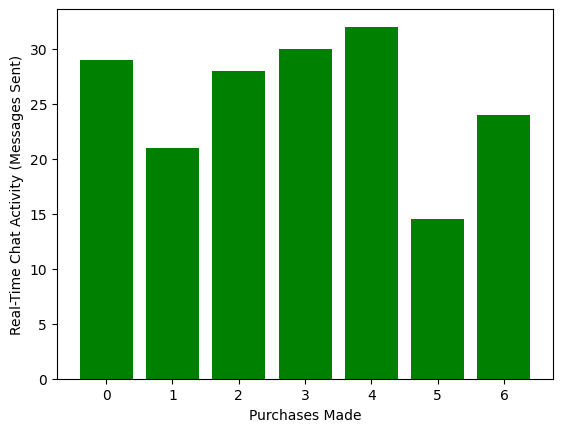

In [182]:
## Filter our original dataset by each purchase amount (0, 1, etc...) and take the median chat activity
# for each amount (Using the median since Real-Time Chat Activity has such a high standard deviation).
# We are examining this column separately from the other two since its range of values is much larger.
zeroPurchases = st.median(fanEngagement[fanEngagement['Virtual Merchandise Purchases'] == 0]['Real-Time Chat Activity (Messages Sent)'])
onePurchase = st.median(fanEngagement[fanEngagement['Virtual Merchandise Purchases'] == 1]['Real-Time Chat Activity (Messages Sent)'])
twoPurchase = st.median(fanEngagement[fanEngagement['Virtual Merchandise Purchases'] == 2]['Real-Time Chat Activity (Messages Sent)'])
threePurchase = st.median(fanEngagement[fanEngagement['Virtual Merchandise Purchases'] == 3]['Real-Time Chat Activity (Messages Sent)'])
fourPurchase = st.median(fanEngagement[fanEngagement['Virtual Merchandise Purchases'] == 4]['Real-Time Chat Activity (Messages Sent)'])
fivePurchase = st.median(fanEngagement[fanEngagement['Virtual Merchandise Purchases'] == 5]['Real-Time Chat Activity (Messages Sent)'])
sixPurchase = st.median(fanEngagement[fanEngagement['Virtual Merchandise Purchases'] == 6]['Real-Time Chat Activity (Messages Sent)'])

## Store our data to be displayed more easily
purchaseData = {'0': zeroPurchases, '1': onePurchase, '2': twoPurchase, '3': threePurchase, '4': fourPurchase, '5': fivePurchase, '6': sixPurchase}

plt.bar(list(purchaseData.keys()), list(purchaseData.values()), color = "green")
plt.xlabel("Purchases Made")
plt.ylabel("Real-Time Chat Activity (Messages Sent)")
plt.show()

The above graph shows that fans who are the most active in chat will most likely make 4, 3, or 0 purchases. The least active will make 5 or 1. 

Let's examine some additional trends by looking at the correlation between purchasing habits and predictive accuracy in challenges.

### Examine additional engagment factors

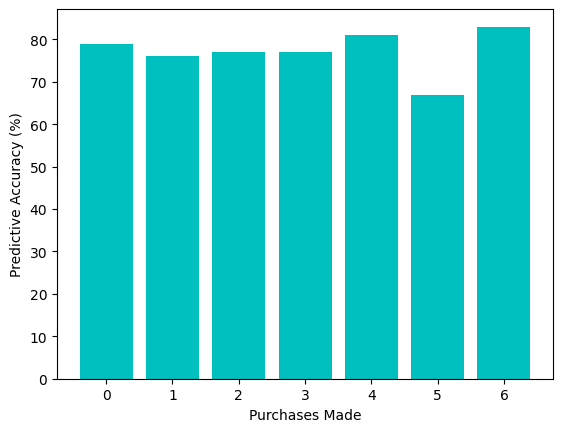

In [183]:
## Filter our original dataset by each purchase amount (0, 1, etc...) and take the median predictive accuracy
# for each amount (Using the median since Predictive Accuracy has such a high standard deviation).
zeroPurchases = st.median(fanEngagement[fanEngagement['Virtual Merchandise Purchases'] == 0]['Predictive Accuracy (%)'])
onePurchase = st.median(fanEngagement[fanEngagement['Virtual Merchandise Purchases'] == 1]['Predictive Accuracy (%)'])
twoPurchase = st.median(fanEngagement[fanEngagement['Virtual Merchandise Purchases'] == 2]['Predictive Accuracy (%)'])
threePurchase = st.median(fanEngagement[fanEngagement['Virtual Merchandise Purchases'] == 3]['Predictive Accuracy (%)'])
fourPurchase = st.median(fanEngagement[fanEngagement['Virtual Merchandise Purchases'] == 4]['Predictive Accuracy (%)'])
fivePurchase = st.median(fanEngagement[fanEngagement['Virtual Merchandise Purchases'] == 5]['Predictive Accuracy (%)'])
sixPurchase = st.median(fanEngagement[fanEngagement['Virtual Merchandise Purchases'] == 6]['Predictive Accuracy (%)'])

## Store our data to be displayed more easily
purchaseData = {'0': zeroPurchases, '1': onePurchase, '2': twoPurchase, '3': threePurchase, '4': fourPurchase, '5': fivePurchase, '6': sixPurchase}

plt.bar(list(purchaseData.keys()), list(purchaseData.values()), color = "c")
plt.xlabel("Purchases Made")
plt.ylabel("Predictive Accuracy (%)")
plt.show()

This graph shows a small correlation between predictive accuracy and purchasing habits. Those who make 4 or 6 purchases have an accuracy of 80% or higher. However, people who make 0 purchases also have a high accuracy right below 80%, and people who make 5 have the lowest accuracy. 

To keep investigating, let's look at the correlation between purchasing habits and the time people spend on Live 360.

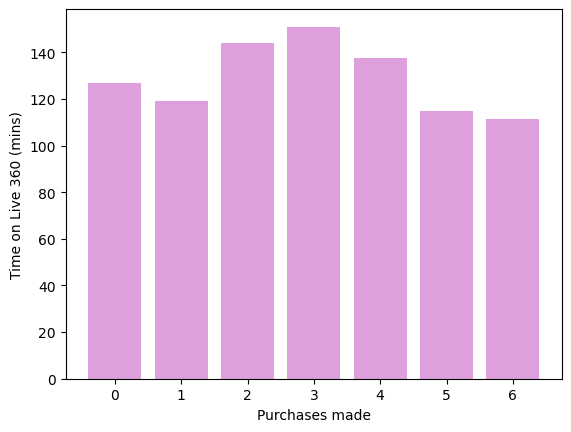

In [184]:
## Filter our original dataset by each purchase amount (0, 1, etc...) and take the median time on Live 360
# for each amount (Using the median since Predictive Accuracy has such a high standard deviation).
zeroPurchases = st.median(fanEngagement[fanEngagement['Virtual Merchandise Purchases'] == 0]['Time on Live 360 (mins)'])
onePurchase = st.median(fanEngagement[fanEngagement['Virtual Merchandise Purchases'] == 1]['Time on Live 360 (mins)'])
twoPurchase = st.median(fanEngagement[fanEngagement['Virtual Merchandise Purchases'] == 2]['Time on Live 360 (mins)'])
threePurchase = st.median(fanEngagement[fanEngagement['Virtual Merchandise Purchases'] == 3]['Time on Live 360 (mins)'])
fourPurchase = st.median(fanEngagement[fanEngagement['Virtual Merchandise Purchases'] == 4]['Time on Live 360 (mins)'])
fivePurchase = st.median(fanEngagement[fanEngagement['Virtual Merchandise Purchases'] == 5]['Time on Live 360 (mins)'])
sixPurchase = st.median(fanEngagement[fanEngagement['Virtual Merchandise Purchases'] == 6]['Time on Live 360 (mins)'])

## Store our data to be displayed more easily
purchaseData = {'0': zeroPurchases, '1': onePurchase, '2': twoPurchase, '3': threePurchase, '4': fourPurchase, '5': fivePurchase, '6': sixPurchase}

plt.bar(list(purchaseData.keys()), list(purchaseData.values()), color = "plum")
plt.xlabel("Purchases made")
plt.ylabel("Time on Live 360 (mins)")
plt.show()

This graph shows that those who spend the most time on Live 360 will make 3, 2, or 4 purchases. Those who spend the least time will make 5 or 6 purchases. It's interesting that people who make the highest number of purchases spend the least time on Live 360. In addition, this trend shows that those who make zero purchases spend an average amount of time on Live 360, similar to the results from looking at total fan engagement.

## Conclusions and Recommendations

Currently, a small majority of VeloCityX users do not use the app to purchase merchandise at all. On average, a user will make 2 or 3 purchases. To boost merchandise sales, we want the app to provide more features and activities that encourage users to buy. Users who purchase more than the average will complete more fan challenges and predict race outcomes with a relatively high degree of accuracy. Users who engage with each other in the chat also tend to buy a little more than the average. It's reasonable to conclude that higher engagement in the factors 'Fan Challenges Completed' and 'Real-Time Chat Activity (Messages Sent)' causes fans to purchase more virtual merchandise. Based on the current data, the best ways to drive merchandise sales are to keep fans engaged by adding more challenges and providing features that allow them to interact with each other. 

I propose an extension of the current fan challenge system in which fans can form teams to complete challenges together. Teams can work in person or use the app's chat function to work together. Teams will compete against each other to complete a certain number of challenges or reach a certain accuracy threshold, earning rewards by working together. This will allow fans to engage with each other and the app, promoting both a sense of community and healthy competition. To encourage completing team challenges, teams should be able to earn exclusive rewards. Teams with high rankings could gain access to exclusive race events that are hosted by sponsors. This acts as a platform for sponsors to interact with and advertise to these dedicated fans, who are more likely to buy merchandise. In addition to adding team challenges, the app's merchandise store should consider releasing customizable jerseys, skins, and collectibles that teams can purchase. Often, people in teams want to match and be able to identify each other. Fans will be more inclined to buy customizable merchandise to feel connected to their team. 

This strategy boosts the three main fan engagement factors  ('Fan Challenges Completed', 'Sponsorship Interactions (Ad Clicks)','Real-Time Chat Activity (Messages Sent)'), emphasizing the ones that have been shown to positively impact sales.